[View in Colaboratory](https://colab.research.google.com/github/billmlion/keras_ws/blob/master/10_keras_CNN_CIFAR_10.ipynb)

>[1.数据准备](#updateTitle=true&folderId=1yY5n-DorvxTG5qnvKJQZLIx43gJuaiyt&scrollTo=CalREujcg94b)

>[2.建立模型](#updateTitle=true&folderId=1yY5n-DorvxTG5qnvKJQZLIx43gJuaiyt&scrollTo=kiw1IYtqjKQO)

>[3.训练模型](#updateTitle=true&folderId=1yY5n-DorvxTG5qnvKJQZLIx43gJuaiyt&scrollTo=2NFjITmcsqUh)



# 1.数据准备

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [3]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [0]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [7]:
y_label_test_OneHot.shape

(10000, 10)

# 2.建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [0]:
#@title 卷积层1，32个滤镜，每个滤镜3x3大小，输入图像大小32x32，色彩3维的RGB三原色
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [0]:
model.add(Dropout(rate=0.25))

In [0]:
#@title 池化层1，将32x32的图像缩小为16x16的图像，个数不变仍然为32
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#@title 卷积层2，将原来32个滤镜转化为64个滤镜，每个滤镜大小3x3
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
#@title 池化层2，将16x16的图像缩小为8x8的图像，个数不变仍然为64
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#@title 建立神经网络(平坦层、隐藏层、输出层)

#1.建立平坦层，加入dropout(0.25),随机丢弃25%的神经元，以避免过度拟合
model.add(Flatten())
model.add(Dropout(rate=0.25))

#2.建立隐藏层共有1024个神经元
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

#3.建立输出层，共有10个神经元，使用softmax激活函数，将神经元输出转换为预测每一个图像类别的概率
model.add(Dense(10, activation='softmax'))


In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 3.训练模型

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 13s 332us/step - loss: 1.4851 - acc: 0.4647 - val_loss: 1.2873 - val_acc: 0.5707
Epoch 2/10
40000/40000 [==============================] - 10s 262us/step - loss: 1.1339 - acc: 0.5959 - val_loss: 1.1074 - val_acc: 0.6430
Epoch 3/10
18304/40000 [============>.................] - ETA: 5s - loss: 0.9998 - acc: 0.6483

40000/40000 [==============================] - 10s 262us/step - loss: 0.9815 - acc: 0.6546 - val_loss: 1.0223 - val_acc: 0.6575
Epoch 4/10
40000/40000 [==============================] - 10s 262us/step - loss: 0.8739 - acc: 0.6920 - val_loss: 0.9553 - val_acc: 0.6937
Epoch 5/10
39296/40000 [============================>.] - ETA: 0s - loss: 0.7838 - acc: 0.7264

40000/40000 [==============================] - 10s 261us/step - loss: 0.7836 - acc: 0.7263 - val_loss: 0.8726 - val_acc: 0.7059
Epoch 6/10
40000/40000 [==============================] - 10s 261us/step - loss: 0.7022 - acc: 0.7548 - val_loss: 0.8354 - val_acc: 0.7238
Epoch 7/10
40000/40000 [==============================] - 10s 261us/step - loss: 0.6218 - acc: 0.7817 - val_loss: 0.8207 - val_acc: 0.7263
Epoch 8/10
 3712/40000 [=>............................] - ETA: 8s - loss: 0.5276 - acc: 0.8106

40000/40000 [==============================] - 10s 262us/step - loss: 0.5548 - acc: 0.8056 - val_loss: 0.7827 - val_acc: 0.7368
Epoch 9/10
40000/40000 [==============================] - 11s 263us/step - loss: 0.4944 - acc: 0.8268 - val_loss: 0.7731 - val_acc: 0.7344
Epoch 10/10
36480/40000 [==========================>...] - ETA: 0s - loss: 0.4311 - acc: 0.8493

40000/40000 [==============================] - 10s 258us/step - loss: 0.4327 - acc: 0.8491 - val_loss: 0.7792 - val_acc: 0.7324


In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

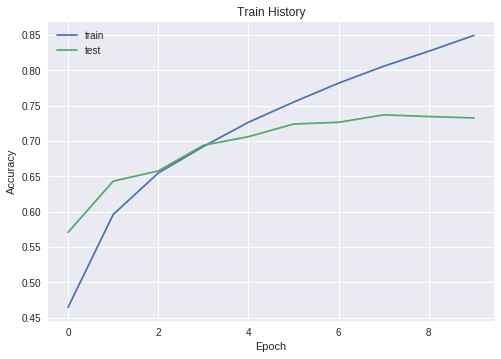

In [21]:
show_train_history('acc','val_acc')

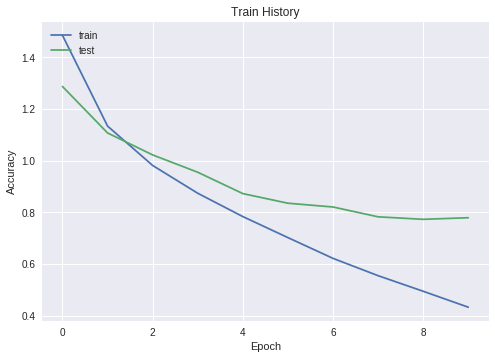

In [22]:
show_train_history('loss','val_loss')

# 4.评估模型准去率


In [23]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.7289

# 5.进行预测

In [0]:
prediction=model.predict_classes(x_img_test_normalize)

In [25]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

# 6.查看预测结果

In [0]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

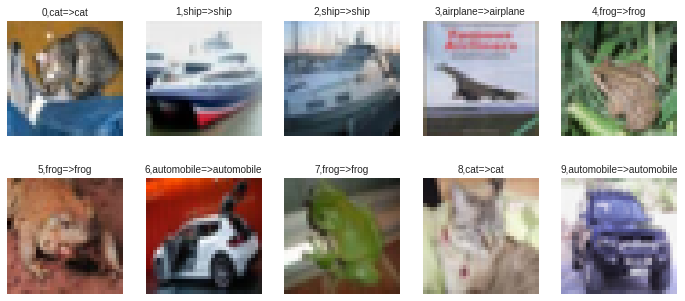

In [28]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

# 7.查看预测概率

In [0]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [0]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


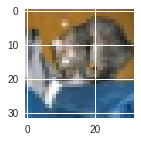

airplane Probability:0.001261537
automobile Probability:0.001060955
bird Probability:0.011103108
cat Probability:0.762842774
deer Probability:0.002825757
dog Probability:0.182116777
frog Probability:0.033559784
horse Probability:0.000738411
ship Probability:0.004329358
truck Probability:0.000161627


In [31]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,0)

label: airplane predict: airplane


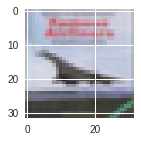

airplane Probability:0.568426847
automobile Probability:0.005235250
bird Probability:0.055281315
cat Probability:0.001673995
deer Probability:0.013659763
dog Probability:0.000053406
frog Probability:0.000088472
horse Probability:0.001304402
ship Probability:0.353996992
truck Probability:0.000279537


In [32]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)

# 8.show confusion matrix

In [33]:
prediction.shape

(10000,)

In [34]:
y_label_test.shape

(10000, 1)

In [35]:
y_label_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [36]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [37]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,816,5,76,9,13,7,15,6,41,12
1,39,801,21,13,5,14,20,6,35,46
2,52,2,696,45,67,45,72,14,6,1
3,19,2,114,512,56,172,102,18,5,0
4,27,1,114,49,670,24,83,26,6,0
5,10,2,84,141,37,636,50,33,5,2
6,5,1,41,35,10,20,883,3,2,0
7,16,0,60,30,62,74,13,742,3,0
8,64,19,29,12,7,14,15,1,826,13
